In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from numpy import mean, std

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [204]:
print('Given two data sets, both including information about countries quality of living and their happiness score.')
print('One data set contains data from the early 2000s up until 2020, and the other includes only data from 2021.')
print('The data set was taken from Kaggle.com with little information on how the Happiness score was calculated.')
print('Both data sets share many of the same columns but there are many differences as well.')
print('Below I created two models for predicting the Happiness score of 2021.')
print('This first model uses the most recent years data to predict the 2021 score.')
print('The second model uses the 2021 data to predict the 2021 score.')

Given two data sets, both including information about countries quality of living and their happiness score.
One data set contains data from the early 2000s up until 2020, and the other includes only data from 2021.
The data set was taken from Kaggle.com with little information on how the Happiness score was calculated.
Both data sets share many of the same columns but there are many differences as well.
Below I created two models for predicting the Happiness score of 2021.
This first model uses the most recent years data to predict the 2021 score.
The second model uses the 2021 data to predict the 2021 score.


In [205]:
df=     pd.read_csv('/Users/robertrindos/Desktop/Data sets/world-happiness-report.csv')
df2021= pd.read_csv('/Users/robertrindos/Desktop/Data Sets/world-happiness-report-2021.csv')

In [206]:
print(df.shape)
print(df.columns)
#print(df)
print(df2021.shape)
print(df2021.columns)
#print(df2021)

(1949, 11)
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')
(149, 20)
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


In [207]:
grouped=df.groupby('Country name')
most_recent_year=grouped.max()
df=most_recent_year
df.dropna().reset_index()
#print(df)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2019,4.758,7.725,0.559,53.2,0.718,0.236,0.954,0.710,0.502
1,Albania,2020,5.867,9.544,0.833,69.3,0.824,0.009,0.914,0.713,0.350
2,Algeria,2019,6.355,9.362,0.839,66.1,0.593,0.005,0.759,0.661,0.377
3,Angola,2014,5.589,9.017,0.755,54.6,0.584,0.055,0.911,0.659,0.371
4,Argentina,2020,6.776,10.112,0.938,69.2,0.881,-0.122,0.885,0.864,0.342
...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,2020,7.478,9.826,0.955,66.9,0.838,-0.031,0.890,0.867,0.396
151,Vietnam,2019,5.767,8.992,0.898,68.1,0.952,0.201,0.838,0.751,0.241
152,Yemen,2019,4.809,8.453,0.870,57.5,0.706,0.011,0.885,0.611,0.379
153,Zambia,2020,5.260,8.167,0.864,56.3,0.823,0.140,0.948,0.833,0.394


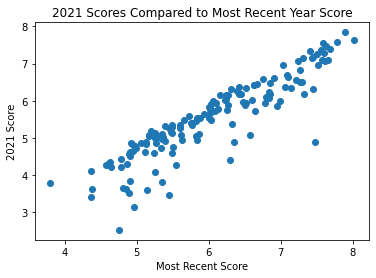

In [221]:
# Merging 2021 data onto the previous years data, and selecting the useful features.
# This model is using previous year's data to predict the 2021 happiness score
merged=pd.merge(df,df2021[['Country name','Ladder score']], on='Country name')
useful_df=merged.iloc[:,2:12]
useful_df.fillna(0, inplace=True)
#print(useful_df.isna().sum())

plt.scatter(useful_df['Life Ladder'],useful_df['Ladder score'])
plt.title('2021 Scores Compared to Most Recent Year Score')
plt.xlabel('Most Recent Score')
plt.ylabel('2021 Score')
plt.show()

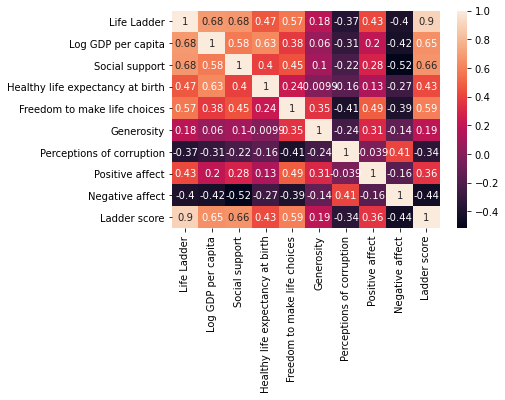

In [222]:
# Standardizing all values in the data frame that includes the features and happiness score.
scaler=StandardScaler()
standardized_df=scaler.fit_transform(useful_df)
standardized_df=pd.DataFrame(standardized_df, columns=useful_df.columns)
#print(standardized_df)
corrMatrix = standardized_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Train score (R-squared):
0.8391825911371018

Test score (R-squared):
0.8007829512542616

Using 2 through 12 KFold cross validations to improve model:

    K-Folds    scores
0         2  0.683267
1         3  0.741234
2         4  0.719194
3         5  0.696462
4         6  0.762834
5         7  0.778413
6         8  0.764724
7         9  0.778103
8        10  0.637902
9        11  0.620358
10       12  0.614574

The optimal K-Folds is 7 with an R-Squared score of 0.7784

Average R-Squared Score: 0.7088
Maximum R-Squared Score: 0.7784
Minimum R-Squared Score: 0.6146


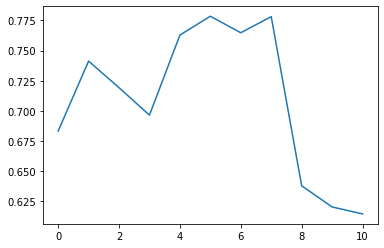

In [210]:
# Building the linear regression model using standardized data from the most previous year
x=standardized_df.iloc[:,0:9]
y=standardized_df['Ladder score']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=10)
futuremodel = LinearRegression()
futuremodel.fit(x_train, y_train)
y_predict= futuremodel.predict(x_test)

print("Train score (R-squared):")
print(futuremodel.score(x_train, y_train))

print('')

print("Test score (R-squared):")
print(futuremodel.score(x_test, y_test))

# Finding optimal K-Folds for cross validation
print('')

print('Using 2 through 12 KFold cross validations to improve model:')
print('')
scores=[]
for k in range(0,11):
    KFolds = KFold(n_splits=k+2, random_state=1, shuffle=True)
    score=cross_val_score(futuremodel, x_train, y_train,scoring='r2', cv=KFolds)
    scores.append(mean(score))
folds=pd.DataFrame()
folds['K-Folds']=list(range(2,13))
folds['scores']=scores
print(folds)
print('')
print('The optimal K-Folds is 7 with an R-Squared score of 0.7784')
print('')
print('Average R-Squared Score: %2.4f' % (mean(scores)))
print('Maximum R-Squared Score: %2.4f' % (max(scores)))
print('Minimum R-Squared Score: %2.4f' % (min(scores)))
plt.plot(scores)
plt.show()

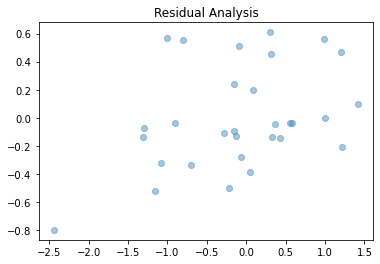

Coefficient List : 
[ 0.83941565  0.0201081   0.04979442 -0.0171175   0.14323369  0.05260942
  0.0607056  -0.133612   -0.08042061]


In [211]:
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()
print('Coefficient List : ')
print(futuremodel.coef_)

/Users/robertrindos/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


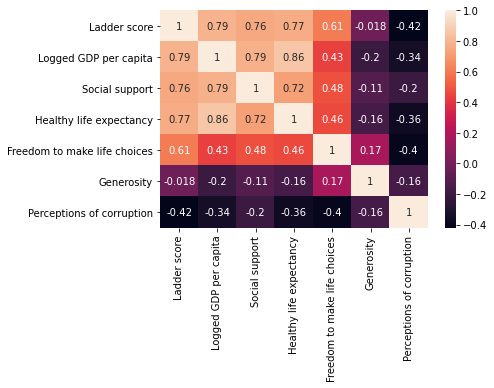

In [212]:
# Selecting features and happiness score from the 2021 data frame

#print(df2021.columns)
useful_df2021=df2021[['Ladder score', 'Logged GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices','Generosity','Perceptions of corruption']]  
useful_df2021.fillna(0, inplace=True)
#print(useful_df2)

# Standardizing all values in the data frame that includes the features and happiness score.

scaler=StandardScaler()
standardized_df2021=scaler.fit_transform(useful_df2021)
standardized_df2021=pd.DataFrame(standardized_df2021, columns=useful_df2021.columns)
#print(standardized_df2021)
corrMatrix = standardized_df2021.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Train score (R-squared):
0.7887554499919065

Test score (R-squared):
0.613188316966116

Using 2 through 12 KFold cross validations to improve model:

    K-Folds    scores
0         2  0.690944
1         3  0.670964
2         4  0.693148
3         5  0.712454
4         6  0.669048
5         7  0.653464
6         8  0.658752
7         9  0.672763
8        10  0.642488
9        11  0.625704
10       12  0.644264

The optimal K-Folds is 5 with an R-Squared score of 0.7125

Average R-Squared Score: 0.6667
Maximum R-Squared Score: 0.7125
Minimum R-Squared Score: 0.6257


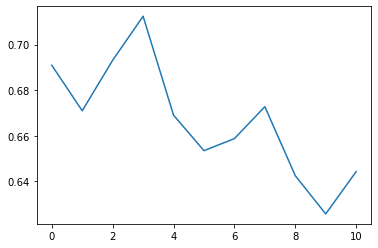

In [213]:
# Building the linear regression model using standardized data from the most previous year
# 
x=standardized_df2021.iloc[:,1:7]
y=standardized_df2021['Ladder score']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=10)
presentmodel = LinearRegression()
presentmodel.fit(x_train, y_train)
y_predict= presentmodel.predict(x_test)

print("Train score (R-squared):")
print(presentmodel.score(x_train, y_train))

print('')

print("Test score (R-squared):")
print(presentmodel.score(x_test, y_test))

# Finding optimal K-Folds for cross validation
print('')

print('Using 2 through 12 KFold cross validations to improve model:')

print('')

scores=[]
for k in range(0,11):
    KFolds = KFold(n_splits=k+2, random_state=1, shuffle=True)
    score=cross_val_score(presentmodel, x_train, y_train,scoring='r2', cv=KFolds)
    scores.append(mean(score))
folds=pd.DataFrame()
folds['K-Folds']=list(range(2,13))
folds['scores']=scores
print(folds)

print('')

print('The optimal K-Folds is 5 with an R-Squared score of 0.7125')

print('')

print('Average R-Squared Score: %2.4f' % (mean(scores)))
print('Maximum R-Squared Score: %2.4f' % (max(scores)))
print('Minimum R-Squared Score: %2.4f' % (min(scores)))
plt.plot(scores)
plt.show()

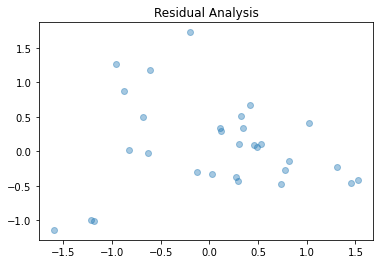

Coefficient List : 
[ 0.2012909   0.38120637  0.16945178  0.21273724  0.03279335 -0.09614369]


In [214]:
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()
print('Coefficient List : ')
print(presentmodel.coef_)

In [215]:
print('Surprisingly, the data from the most previous year seems to be slightly better at predicting the 2021 Happiness scores than the data from 2021.')
print('This could be attributed to the additional features that are included in the data set prior to 2021.')
print('These additional features include, the previous years score, and the positive and negative affects.')
print('The forward-predictive model could have also scored better because it is possible that the happiness rating was determined with this previous data, or even through forecasting.')

Surprisingly, the data from the most previous year seems to be slightly better at predicting the 2021 Happiness scores than the data from 2021.
This could be attributed to the additional features that are included in the data set prior to 2021.
These additional features include, the previous years score, and the positive and negative affects.
The forward-predictive model could have also scored better because it is possible that the happiness rating was determined with this previous data, or even through forecasting.
